### Классификация, деревья решений и метод ближайших соседей

In [38]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

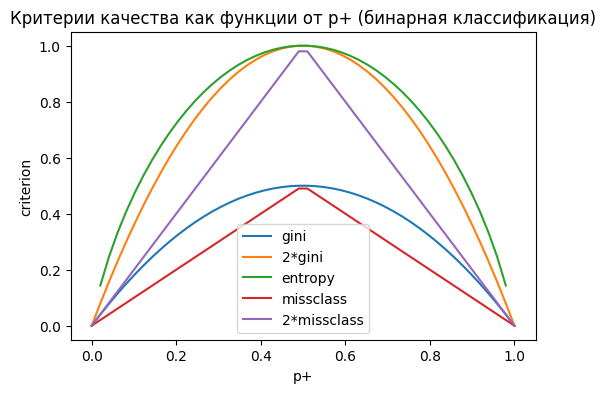

In [39]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend()

In [40]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

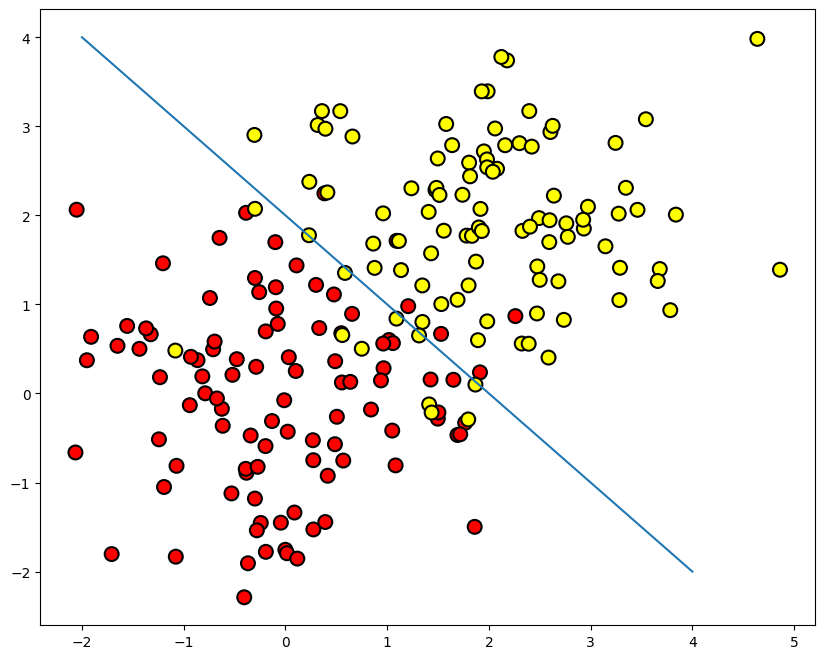

In [42]:

plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

[[ 1.69052570e+00 -4.65937371e-01]
 [ 3.28201637e-02  4.07516283e-01]
 [-7.88923029e-01  2.06557291e-03]
 [-8.90385858e-04 -1.75472431e+00]
 [ 1.01765801e+00  6.00498516e-01]
 [-6.25428974e-01 -1.71548261e-01]
 [ 5.05299374e-01 -2.61356415e-01]
 [-2.42749079e-01 -1.45324141e+00]
 [ 5.54580312e-01  1.23880905e-01]
 [ 2.74459924e-01 -1.52652453e+00]
 [ 1.65069969e+00  1.54335535e-01]
 [-3.87139943e-01  2.02907222e+00]
 [-4.53860299e-02 -1.45067870e+00]
 [-4.05227855e-01 -2.28831510e+00]
 [ 1.04939655e+00 -4.16474319e-01]
 [-7.42553525e-01  1.07247013e+00]
 [-1.65107559e+00  5.35429356e-01]
 [-2.06441480e+00 -6.62159340e-01]
 [-1.20421985e+00  1.46197563e+00]
 [ 1.76616088e+00 -3.29413752e-01]
 [ 8.40733242e-01 -1.79986401e-01]
 [ 5.68061887e-01 -7.52837196e-01]
 [-1.70833920e+00 -1.80309866e+00]
 [ 3.83121852e-01  2.24759505e+00]
 [ 2.69411631e-01 -5.24604619e-01]
 [ 1.91201886e+00  2.37301847e-01]
 [ 1.01433985e-01  2.52577736e-01]
 [-1.32377198e-01 -3.09476341e-01]
 [-1.43496347e+00  5

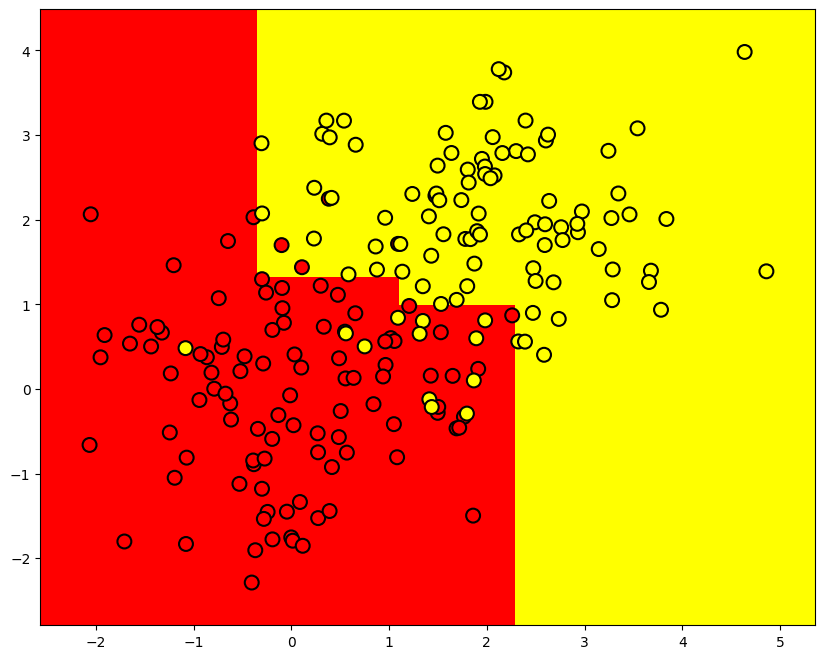

In [96]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(X, eps=.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, eps),  np.arange(y_min, y_max, eps))
    return xx, yy

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

print(train_data)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)

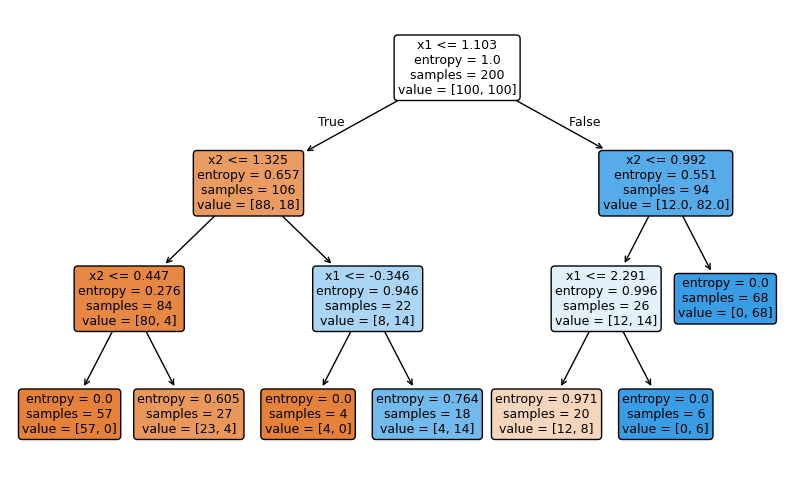

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
tree.plot_tree(
    clf_tree,
    feature_names=['x1', 'x2'],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.show()

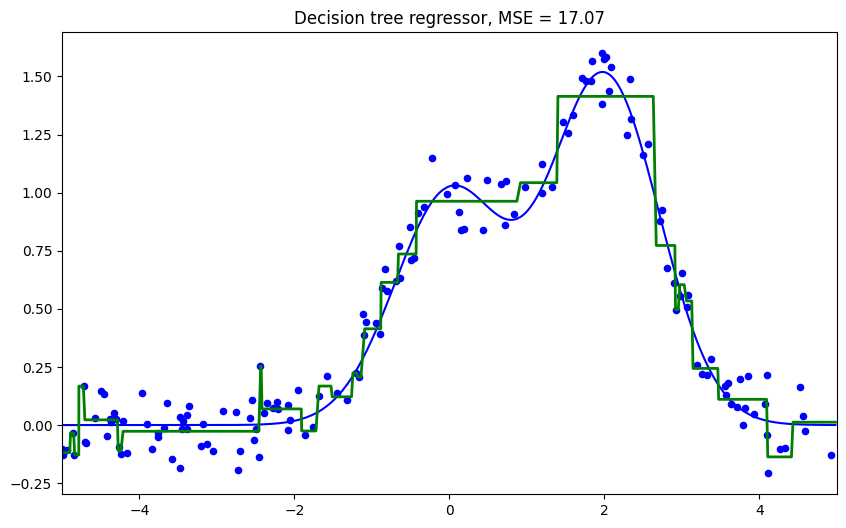

In [ ]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test) # делает предсказания с помощью обученной модели reg_tree на новых данных X_test

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

## Деревья решений и метод ближайших соседей в задаче прогнозирования оттока клиентов телеком-оператора

Считаем данные в DataFrame и проведем предобработку. Штаты пока сохраним в отдельный объект Series, но удалим из датафрейма. Первую модель будем обучать без штатов, потом посмотрим, помогают ли они.

In [54]:
df = pd.read_csv('./resources/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
# Сначала сохраняем целевую переменную
y = df['Churn'].astype('int')  # здесь сразу конвертируем в int
states = df['State']

# Потом удаляем ненужные столбцы
df.drop(['State', 'Churn'], axis=1, inplace=True)

# Преобразуем категориальные переменные
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]

df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Выделим 70% выборки (`X_train`, `y_train`) под обучение и 30% будут отложенной выборкой (`X_holdout`, `y_holdout`). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели. Обучим 2 модели – дерево решений и `kNN`, пока не знаем, какие параметры хороши, поэтому наугад: глубину дерева берем 5, число ближайших соседей – 10.


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# df.values — все признаки (features) вашего датафрейма в виде numpy массива.
# y — целевая переменная (Churn), которую хотим предсказывать.
# train_test_split — функция из sklearn.model_selection, которая случайным образом делит данные на обучающую и тестовую (или holdout) выборку.
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)


# DecisionTreeClassifier — дерево решений.
# max_depth=5 — ограничение глубины дерева (чтобы не было переобучения).
# random_state=17 — фиксирует случайные разбиения внутри алгоритма.

# KNeighborsClassifier — метод k-ближайших соседей.
# n_neighbors=10 — число соседей, по которым принимается решение.
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

# .fit() — метод обучения модели на данных X_train и y_train.
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,17
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [59]:
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Качество прогнозов будем проверять с помощью простой метрики – доли правильных ответов. Сделаем прогнозы для отложенной выборки. Дерево решений справилось лучше: доля правильных ответов около 94% против 88% у kNN. Но это мы пока выбирали параметры наугад.

In [60]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.94

0.94

In [61]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred) # 0.88

0.881

Теперь настроим параметры дерева на кросс-валидации. Настраивать будем максимальную глубину и максимальное используемое на каждом разбиении число признаков. Суть того, как работает `GridSearchCV`: для каждой уникальной пары значений параметров `max_depth` и `max_features` будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [62]:
from sklearn.model_selection import GridSearchCV, cross_val_score


tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


,estimator,DecisionTreeC...ndom_state=17)
,param_grid,"{'max_depth': range(1, 11), 'max_features': range(4, 19)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [69]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 6, 'max_features': 17}, np.float64(0.94257014456259))

In [65]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.946

Теперь попробуем настроить число соседей в алгоритме kNN.

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,estimator,Pipeline(step...(n_jobs=-1))])
,param_grid,"{'knn__n_neighbors': range(1, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [67]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, np.float64(0.8859867109023905))

In [68]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

В этом примере дерево показало себя лучше, чем метод ближайших соседей: 94.2% правильных ответов на кросс-валидации и 94.6% на отложенной выборке против 88.6% / 89% для kNN. Более того, в данной задаче дерево проявляет себя очень хорошо, и даже случайный лес (который пока представляем просто как кучу деревьев, которые вместе работают почему-то намного лучше, чем одно дерево) в этом примере показывает долю правильных ответов не намного выше (95.1% на кросс-валидации и 95.3% –на отложенной выборке), а обучается намного дольше.

In [71]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

0.9494233119813256


In [72]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


,estimator,RandomForestC...ndom_state=17)
,param_grid,"{'max_depth': range(1, 11), 'max_features': range(4, 19)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [73]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 9, 'max_features': 6}, np.float64(0.9511372931045574))

Нарисуем получившееся дерево. Из-за того, что оно не совсем игрушечное (максимальная глубина – 6), картинка получается уже не маленькой, но по дереву можно "прогуляться", если отдельно открыть рисунок.

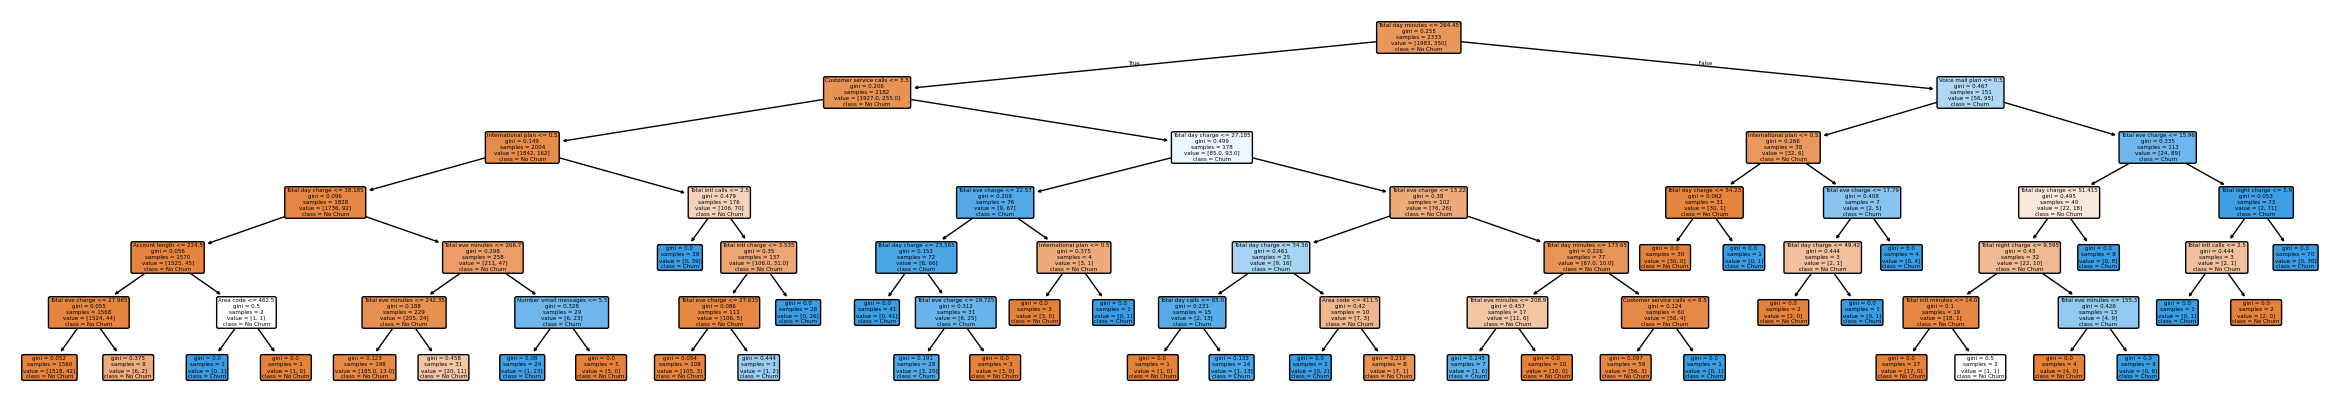

In [99]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,5))
tree.plot_tree(
    tree_grid.best_estimator_,
    feature_names=df.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=4
)
plt.show()

### Сложный случай для деревьев решений

В продолжение обсуждения плюсов и минусов обсуждаемых методов приведем очень простой пример задачи классификации, с которым дерево справляется, но делает все как-то "сложнее", чем хотелось бы. Создадим множество точек на плоскости (2 признака), каждая точка будет относиться к одному из классов (+1, красные, или -1 – желтые). Если смотреть на это как на задачу классификации, то вроде все очень просто – классы разделяются прямой.

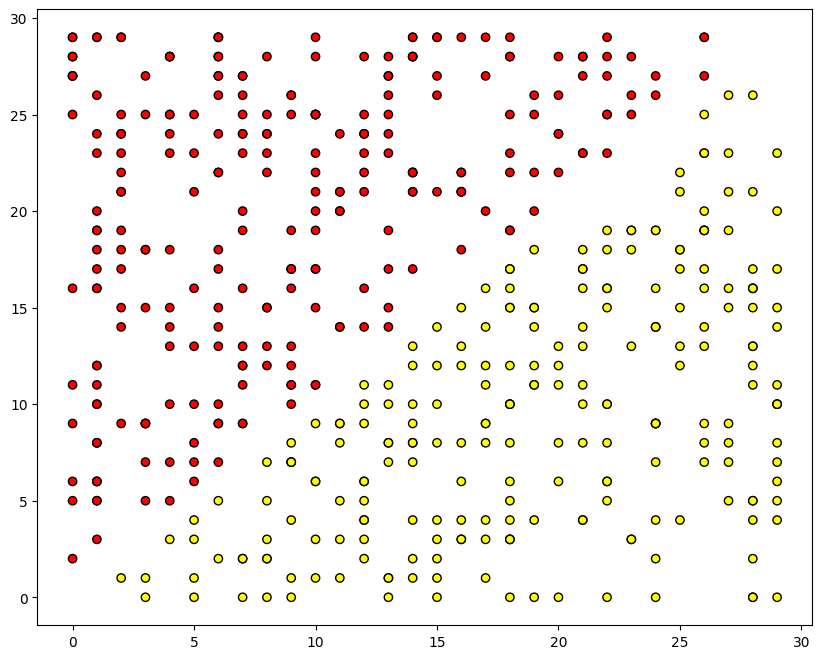

In [105]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')

Однако дерево решений строит уж больно сложную границу и само по себе оказывается глубоким. Кроме того, представьте, как плохо дерево будет обобщаться на пространство вне представленного квадрата $30 \times 30$, обрамляющего обучающую выборку.

Text(0.5, 1.0, 'Easy task. Decision tree compexifies everything')

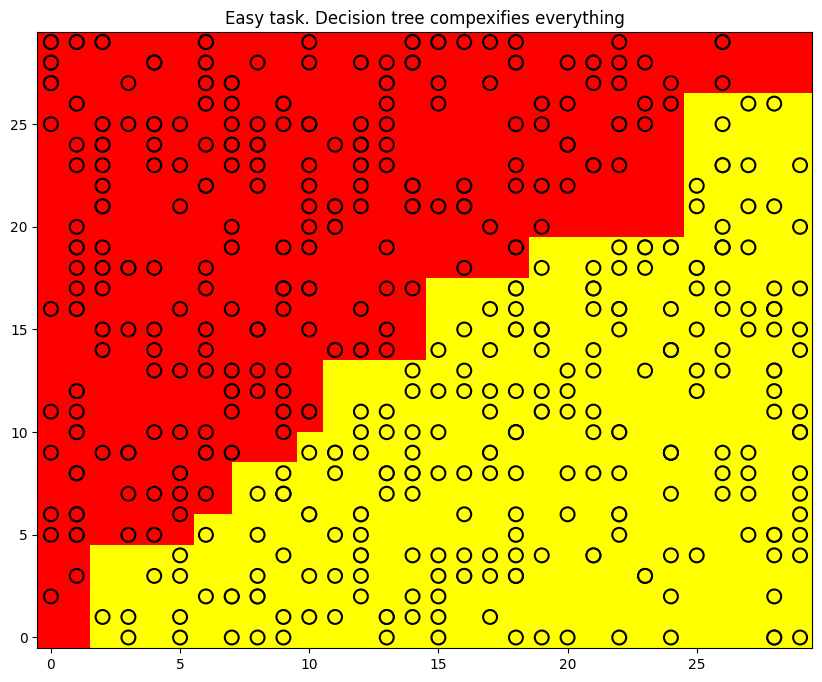

In [106]:
decisiontree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X, eps=.05)
predicted = decisiontree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)

plt.title('Easy task. Decision tree compexifies everything')

Вот такая сложная конструкция, хотя решение (хорошая разделяющая поверхность) – это всего лишь прямая $x_1 = x_2$.

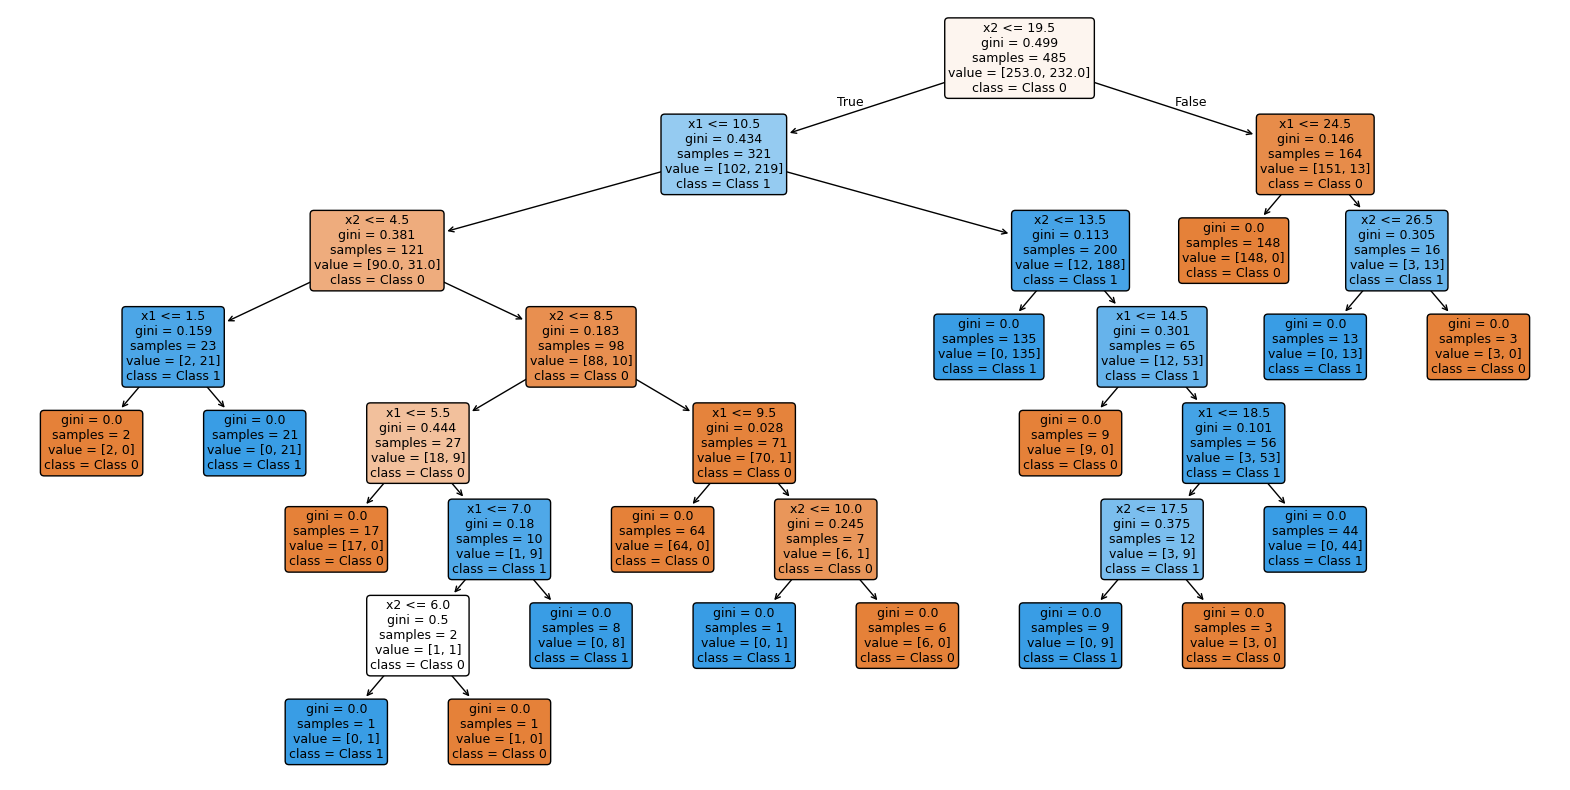

In [111]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
    decisiontree,  # твой обученный классификатор
    feature_names=['x1', 'x2'],
    class_names=['Class 0', 'Class 1'],  # метки классов
    filled=True,
    rounded=True,
    fontsize=9
)
plt.show()

Метод одного ближайшего соседа здесь справляется вроде лучше дерева, но все же не так хорошо, как линейный классификатор (наша следующая тема).

Text(0.5, 1.0, 'Easy task, kNN. Not bad')

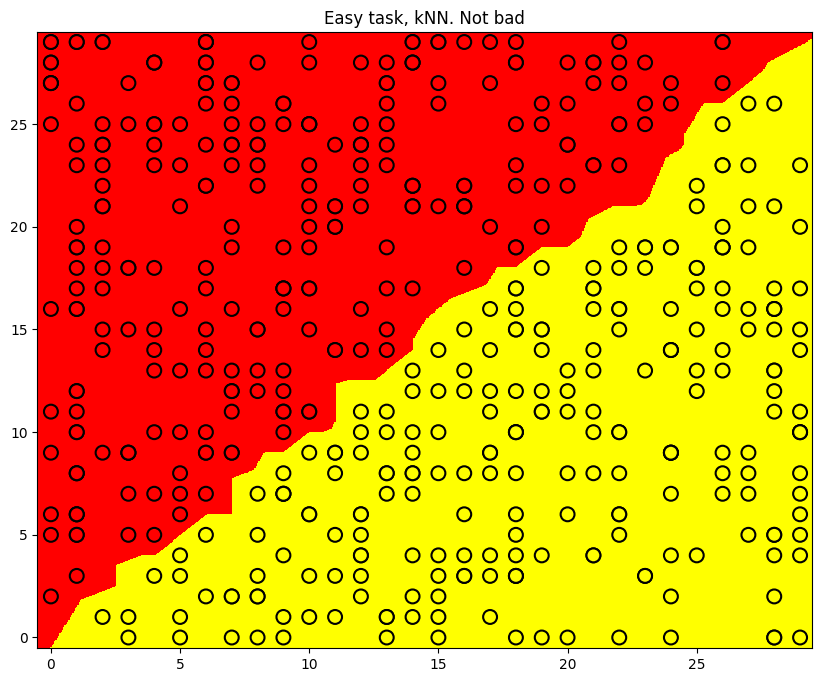

In [112]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X, eps=.05)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)

plt.title('Easy task, kNN. Not bad')

### Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST

Теперь посмотрим на описанные 2 алгоритма в реальной задаче. Используем "встроенные" в `sklearn` данные по рукописным цифрам. Эта задача будет примером, когда метод ближайших соседей работает на удивление хорошо.

Картинки здесь представляются матрицей 8 x 8 (интенсивности белого цвета для каждого пикселя). Далее эта матрица "разворачивается" в вектор длины 64, получается признаковое описание объекта.

Нарисуем несколько рукописных цифр, видим, что они угадываются.

In [113]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

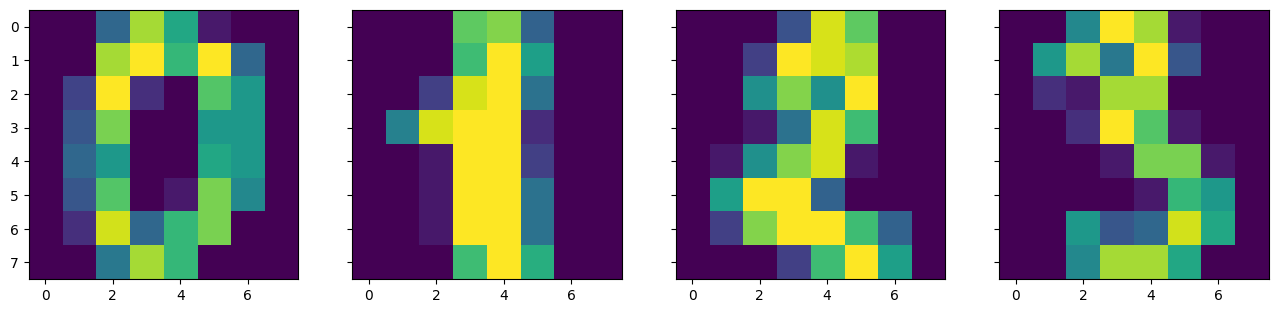

In [115]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
  axes[i].imshow(X[i,:].reshape([8,8]))

Далее проведем ровно такой же эксперимент, как и в прошлой задаче, только диапазоны изменения настраиваемых параметров будут немного другие.

Выделим 70% выборки (`X_train`, `y_train`) под обучение и 30% будут отложенной выборкой (`X_holdout`, `y_holdout`). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.

In [116]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

Обучим дерево решений и kNN, опять параметры пока наугад берем.

In [117]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,17
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [118]:
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился намного лучше. Но это мы пока выбирали параметры наугад.

In [120]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)

accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred) # (0.97, 0.666)

(0.9740740740740741, 0.6666666666666666)

Теперь так же, как раньше настроим параметры моделей на кросс-валидации, только учтем, что признаков сейчас больше, чем в прошлой задаче — 64.

In [121]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


,estimator,DecisionTreeC...ndom_state=17)
,param_grid,"{'max_depth': [1, 2, ...], 'max_features': [1, 2, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [122]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, np.float64(0.8568203376968316))

Это уже не 66%, но и не 97%. Метод ближайших соседей на этом наборе данных работает лучше. В случае одного ближайшего соседа на кросс-валидации достигается почти 99% угадываний.

In [123]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) # 0.987

np.float64(0.9864858028204642)

Обучим на этих же данных случайный лес, он на большинстве выборок работает лучше, чем метод ближайших соседей. Но сейчас у нас исключение.

In [124]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)) 

np.float64(0.9753462341111744)

Вы будете правы, если возразите, что мы тут не настраивали параметры RandomForestClassifier, но даже с настройкой доля правильных ответов не достигает 98%, как для у метода одного ближайшего соседа.

| Model | CV    | Holdout |
|-------|-------|---------|
| DT    | 0.844 | 0.838   |
| kNN   | 0.987 | 0.983   |
| RF    | 0.935 | 0.941   |

Вывод по этому эксперименту (и общий совет): вначале проверяйте на своих данных простые модели – дерево решений и метод ближайших соседей (а в следующий раз сюда добавится логистическая регрессия), может оказаться, что уже они работают достаточно хорошо.

### Сложный случай для метода ближайших соседей

Теперь рассмотрим еще один простой пример. В задаче классификации один из признаков будет просто пропорционален вектору ответов, но методу ближайших соседей это не поможет.

In [127]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.random.seed(random_seed)
    y = np.random.choice([-1, 1], size=n_obj)
    # первый признак пропорционален целевому
    x1 = 0.3 * y
    # остальные признаки – шум
    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

Как обычно, будем смотреть на долю правильных ответов на кросс-валидации и на отложенной выборке. Построим кривые, отражающие зависимость этих величин от параметра n_neighbors в методе ближайших соседей. Такие кривые называются кривыми валидации.


Видим, что метод ближайших соседей с евклидовой метрикой не справляется с задачей, даже если варьировать число ближайших соседей в широком диапазоне. Напротив, дерево решений легко "обнаруживает" скрытую зависимость в данных при любом ограничении на максимальную глубину.

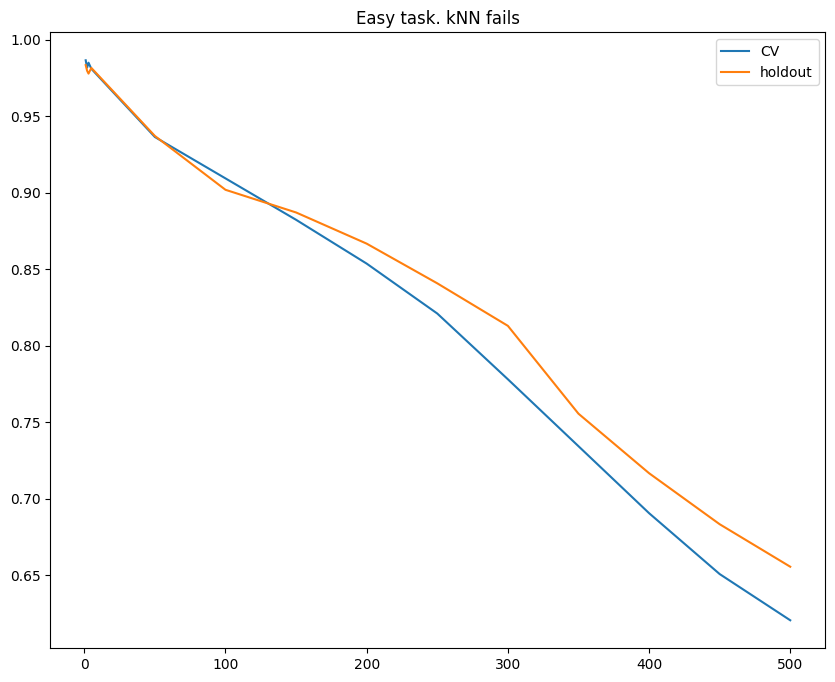

In [140]:
from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend()

In [148]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)

tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)

tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 0.20208056662239932, holdout: 0.17777777777777778


одноуровневая (max_depth=1) Decision Tree совсем плохо работает

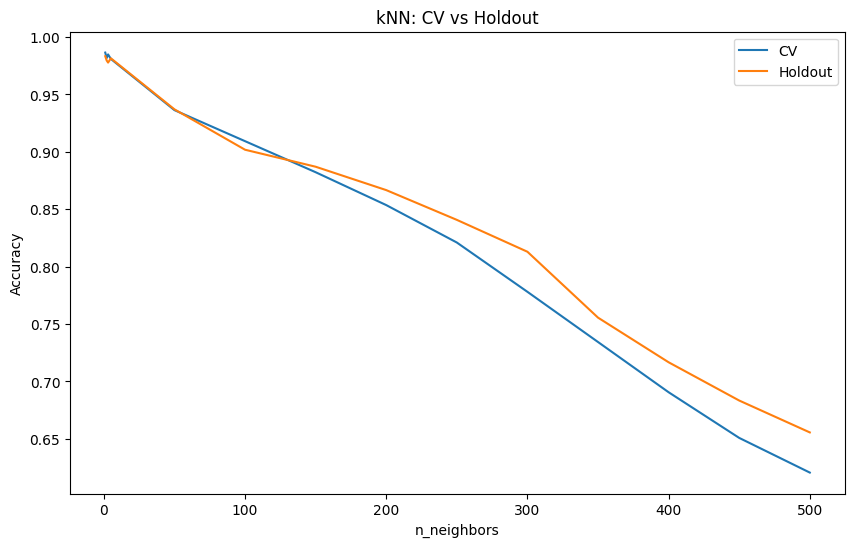

Best Decision Tree depth: 10
CV accuracy: 0.844
Holdout accuracy: 0.848


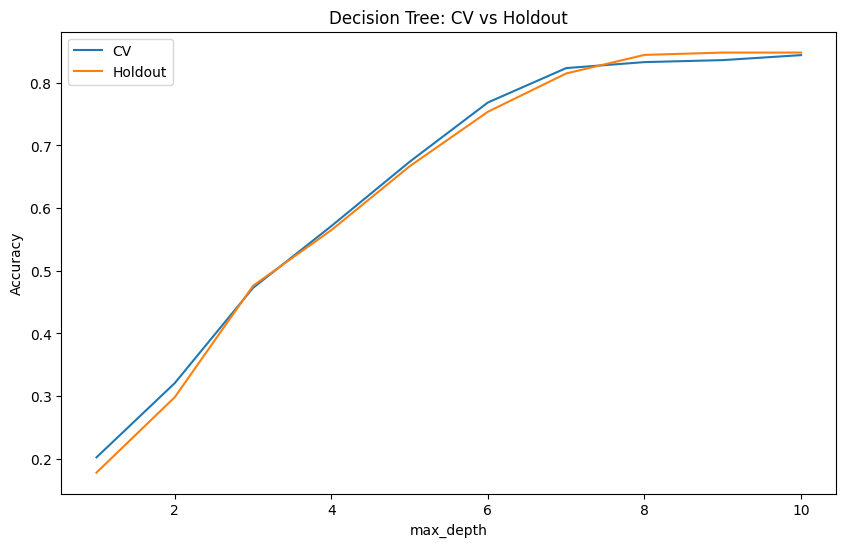

In [142]:
# kNN
cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:
    knn = KNeighborsClassifier(n_neighbors=k)
    # CV на тренировочных данных
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    # обучение на всех тренировочных данных
    knn.fit(X_train, y_train)
    # оценка на holdout
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))

# График CV vs Holdout для kNN
plt.figure(figsize=(10,6))
plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='Holdout')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('kNN: CV vs Holdout')
plt.legend()
plt.show()

# Decision Tree с подбором глубины
max_depths = range(1, 11)
dt_cv_scores = []
dt_holdout_scores = []

for depth in max_depths:
    tree = DecisionTreeClassifier(random_state=17, max_depth=depth)
    dt_cv_scores.append(np.mean(cross_val_score(tree, X_train, y_train, cv=5)))
    tree.fit(X_train, y_train)
    dt_holdout_scores.append(accuracy_score(y_holdout, tree.predict(X_holdout)))

# Печать результатов для оптимальной глубины
best_idx = np.argmax(dt_cv_scores)
print(f"Best Decision Tree depth: {max_depths[best_idx]}")
print(f"CV accuracy: {dt_cv_scores[best_idx]:.3f}")
print(f"Holdout accuracy: {dt_holdout_scores[best_idx]:.3f}")

# График CV vs Holdout для Decision Tree
plt.figure(figsize=(10,6))
plt.plot(max_depths, dt_cv_scores, label='CV')
plt.plot(max_depths, dt_holdout_scores, label='Holdout')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: CV vs Holdout')
plt.legend()
plt.show()